In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df['bmi'].fillna(np.mean(df['bmi']),inplace=True)

cat_vars = ['gender','ever_married','work_type','Residence_type','smoking_status']

X_train, X_test, y_train, y_test = train_test_split(df.drop(['stroke','id'],axis=1),
                                                    df['stroke'], test_size=0.2, random_state=0)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer,cat_vars)
    ]
)


clf_dt = Pipeline(
    steps=[('preprocessor',preprocessor),("decision", DecisionTreeClassifier())]
)

clf_dt.fit(X_train,y_train)
pred_dt = clf_dt.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_dt))
print("average precision",average_precision_score(y_test,pred_dt))
print("classification report \n ",classification_report(y_test,pred_dt))
print("---------------------------------------------------------------")




clf_rf = Pipeline(
    steps=[('preprocessor',preprocessor),("Random Forest", RandomForestClassifier())]
)

clf_rf.fit(X_train,y_train)
pred_rf = clf_rf.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_rf))
print("average precision",average_precision_score(y_test,pred_rf))
print("classification report \n ",classification_report(y_test,pred_rf))
print("---------------------------------------------------------------")





clf_xgb = Pipeline(
    steps=[('preprocessor',preprocessor),("xgbpoost", XGBClassifier())]
)

clf_xgb.fit(X_train,y_train)
pred_xgb = clf_xgb.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_xgb))
print("average precision",average_precision_score(y_test,pred_xgb))
print("classification report \n ",classification_report(y_test,pred_xgb))
print("---------------------------------------------------------------")

roc auc score 0.5
average precision 0.05283757338551859
classification report 
                precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

---------------------------------------------------------------
roc auc score 0.5
average precision 0.05283757338551859
classification report 
                precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

---------------------------------------------------------------
[17:12:06] WARNING: C:/Users/Administrator/workspace/xgb

# 2

## SMOTE

In [28]:
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as imbpipe
smt = SMOTE(random_state = 0)


clf_dt = imbpipe(
    steps=[('preprocessor',preprocessor),('smote',smt),("decision", DecisionTreeClassifier())]
)

clf_dt.fit(X_train,y_train)
pred_dt = clf_dt.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_dt))
print("average precision",average_precision_score(y_test,pred_dt))
print("classification report \n ",classification_report(y_test,pred_dt))
print("---------------------------------------------------------------")




clf_rf = imbpipe(
    steps=[('preprocessor',preprocessor),('smote',smt),("Random Forest", RandomForestClassifier())]
)

clf_rf.fit(X_train,y_train)
pred_rf = clf_rf.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_rf))
print("average precision",average_precision_score(y_test,pred_rf))
print("classification report \n ",classification_report(y_test,pred_rf))
print("---------------------------------------------------------------")





clf_xgb = imbpipe(
    steps=[('preprocessor',preprocessor),('smote',smt),("xgbpoost", XGBClassifier())]
)

clf_xgb.fit(X_train,y_train)
pred_xgb = clf_xgb.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_xgb))
print("average precision",average_precision_score(y_test,pred_xgb))
print("classification report \n ",classification_report(y_test,pred_xgb))
print("---------------------------------------------------------------")

roc auc score 0.5790289256198348
average precision 0.0641282838994632
classification report 
                precision    recall  f1-score   support

           0       0.96      0.66      0.78       968
           1       0.08      0.50      0.13        54

    accuracy                           0.65      1022
   macro avg       0.52      0.58      0.46      1022
weighted avg       0.91      0.65      0.75      1022

---------------------------------------------------------------
roc auc score 0.5790289256198348
average precision 0.0641282838994632
classification report 
                precision    recall  f1-score   support

           0       0.96      0.66      0.78       968
           1       0.08      0.50      0.13        54

    accuracy                           0.65      1022
   macro avg       0.52      0.58      0.46      1022
weighted avg       0.91      0.65      0.75      1022

---------------------------------------------------------------
[18:34:54] WARNING: C:/Users

## Random Oversampling

In [31]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

clf_dt = imbpipe(
    steps=[('preprocessor',preprocessor),('random over sampling',ros),("decision", DecisionTreeClassifier())]
)

clf_dt.fit(X_train,y_train)
pred_dt = clf_dt.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_dt))
print("average precision",average_precision_score(y_test,pred_dt))
print("classification report \n ",classification_report(y_test,pred_dt))
print("---------------------------------------------------------------")




clf_rf = imbpipe(
    steps=[('preprocessor',preprocessor),('random over sampling',ros),("Random Forest", RandomForestClassifier())]
)

clf_rf.fit(X_train,y_train)
pred_rf = clf_rf.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_rf))
print("average precision",average_precision_score(y_test,pred_rf))
print("classification report \n ",classification_report(y_test,pred_rf))
print("---------------------------------------------------------------")





clf_xgb = imbpipe(
    steps=[('preprocessor',preprocessor),('random over sampling',ros),("xgbpoost", XGBClassifier())]
)

clf_xgb.fit(X_train,y_train)
pred_xgb = clf_xgb.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_xgb))
print("average precision",average_precision_score(y_test,pred_xgb))
print("classification report \n ",classification_report(y_test,pred_xgb))
print("---------------------------------------------------------------")

roc auc score 0.5701331496786042
average precision 0.062063612862699624
classification report 
                precision    recall  f1-score   support

           0       0.96      0.58      0.73       968
           1       0.07      0.56      0.12        54

    accuracy                           0.58      1022
   macro avg       0.51      0.57      0.43      1022
weighted avg       0.91      0.58      0.69      1022

---------------------------------------------------------------
roc auc score 0.597757881848791
average precision 0.06624628542436761
classification report 
                precision    recall  f1-score   support

           0       0.97      0.51      0.67       968
           1       0.07      0.69      0.13        54

    accuracy                           0.52      1022
   macro avg       0.52      0.60      0.40      1022
weighted avg       0.92      0.52      0.64      1022

---------------------------------------------------------------
[18:44:34] WARNING: C:/Use

## Random Under Sampling

In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()


clf_dt = imbpipe(
    steps=[('preprocessor',preprocessor),('random under sampling',rus),("decision", DecisionTreeClassifier())]
)

clf_dt.fit(X_train,y_train)
pred_dt = clf_dt.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_dt))
print("average precision",average_precision_score(y_test,pred_dt))
print("classification report \n ",classification_report(y_test,pred_dt))
print("---------------------------------------------------------------")




clf_rf = imbpipe(
    steps=[('preprocessor',preprocessor),('random under sampling',rus),("Random Forest", RandomForestClassifier())]
)

clf_rf.fit(X_train,y_train)
pred_rf = clf_rf.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_rf))
print("average precision",average_precision_score(y_test,pred_rf))
print("classification report \n ",classification_report(y_test,pred_rf))
print("---------------------------------------------------------------")





clf_xgb = imbpipe(
    steps=[('preprocessor',preprocessor),('random under sampling',rus),("xgbpoost", XGBClassifier())]
)

clf_xgb.fit(X_train,y_train)
pred_xgb = clf_xgb.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_xgb))
print("average precision",average_precision_score(y_test,pred_xgb))
print("classification report \n ",classification_report(y_test,pred_xgb))
print("---------------------------------------------------------------")

roc auc score 0.6096380471380471
average precision 0.06858456697048658
classification report 
                precision    recall  f1-score   support

           0       0.97      0.53      0.69       968
           1       0.08      0.69      0.14        54

    accuracy                           0.54      1022
   macro avg       0.52      0.61      0.41      1022
weighted avg       0.92      0.54      0.66      1022

---------------------------------------------------------------
roc auc score 0.5568564432200795
average precision 0.060168251160146735
classification report 
                precision    recall  f1-score   support

           0       0.96      0.63      0.76       968
           1       0.07      0.48      0.12        54

    accuracy                           0.62      1022
   macro avg       0.51      0.56      0.44      1022
weighted avg       0.91      0.62      0.73      1022

---------------------------------------------------------------
[18:50:26] WARNING: C:/Us

## Edited Nearest Neighbours

In [33]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()


clf_dt = imbpipe(
    steps=[('preprocessor',preprocessor),('Edited Nearest Neighbours',enn),("decision", DecisionTreeClassifier())]
)

clf_dt.fit(X_train,y_train)
pred_dt = clf_dt.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_dt))
print("average precision",average_precision_score(y_test,pred_dt))
print("classification report \n ",classification_report(y_test,pred_dt))
print("---------------------------------------------------------------")




clf_rf = imbpipe(
    steps=[('preprocessor',preprocessor),('Edited Nearest Neighbours',enn),("Random Forest", RandomForestClassifier())]
)

clf_rf.fit(X_train,y_train)
pred_rf = clf_rf.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_rf))
print("average precision",average_precision_score(y_test,pred_rf))
print("classification report \n ",classification_report(y_test,pred_rf))
print("---------------------------------------------------------------")





clf_xgb = imbpipe(
    steps=[('preprocessor',preprocessor),('Edited Nearest Neighbours',enn),("xgbpoost", XGBClassifier())]
)

clf_xgb.fit(X_train,y_train)
pred_xgb = clf_xgb.predict(X_test)
print("roc auc score", roc_auc_score(y_test,pred_xgb))
print("average precision",average_precision_score(y_test,pred_xgb))
print("classification report \n ",classification_report(y_test,pred_xgb))
print("---------------------------------------------------------------")

roc auc score 0.49655647382920115
average precision 0.05250588742578526
classification report 
                precision    recall  f1-score   support

           0       0.95      0.83      0.88       968
           1       0.05      0.17      0.08        54

    accuracy                           0.79      1022
   macro avg       0.50      0.50      0.48      1022
weighted avg       0.90      0.79      0.84      1022

---------------------------------------------------------------
roc auc score 0.49655647382920115
average precision 0.05250588742578526
classification report 
                precision    recall  f1-score   support

           0       0.95      0.83      0.88       968
           1       0.05      0.17      0.08        54

    accuracy                           0.79      1022
   macro avg       0.50      0.50      0.48      1022
weighted avg       0.90      0.79      0.84      1022

---------------------------------------------------------------
[18:53:30] WARNING: C:/U

## Clearly there is an improvement when using sampling techniques over the imbalanced data set.

# 3
## Selecting important featres using Random Forest

In [64]:
X_train_new = pd.get_dummies(X_train,columns=cat_vars)
X_train_new

rf = RandomForestClassifier().fit(X_train_new,y_train)
rf.feature_importances_

array([2.41020629e-01, 2.93121513e-02, 2.76837925e-02, 2.62023478e-01,
       2.18905740e-01, 1.84046272e-02, 1.64205188e-02, 2.67518874e-08,
       9.34031147e-03, 9.11446921e-03, 1.19775107e-02, 6.96118946e-06,
       1.86993012e-02, 1.95165508e-02, 1.08694090e-03, 1.91526751e-02,
       2.14676350e-02, 1.84896159e-02, 1.85492721e-02, 2.21207966e-02,
       1.67069970e-02])

Text(0.5, 0, 'Random Forest Feature Importance')

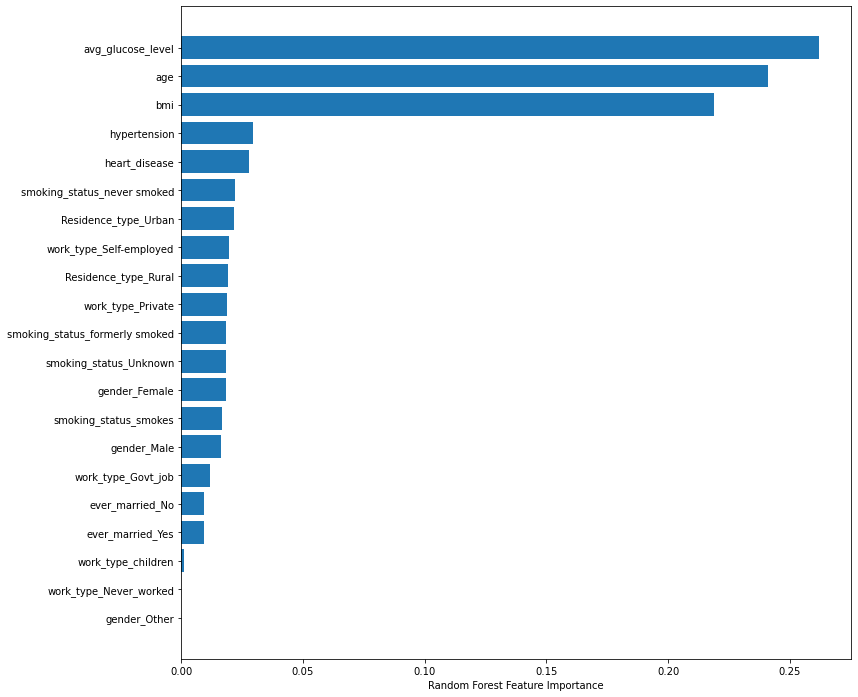

In [69]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(12,12))
plt.barh(X_train_new.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Feature importance of xgboost

[23:32:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

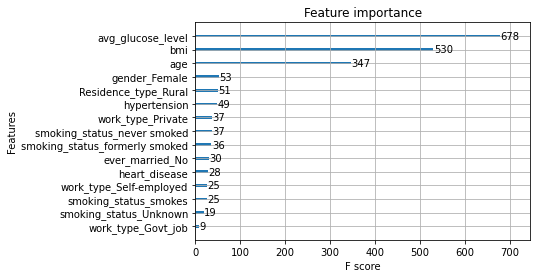

In [71]:
from xgboost import plot_importance
xgb = XGBClassifier().fit(X_train_new,y_train)
plot_importance(xgb)

# 4

Initially with the unbalanced dataset we have seen an roc_auc score of 0.5 for all the three models. An average precision of 0.05283757338551859 for all the models.

The first reampling technique employed is the SMOTE technique, It has improved the ROC AUC score across the models with 0.57 and an increase in average precision with a score of 0.06412.
The second tehnique used is the Ransom Oversampling, where the ROC AUC score is 0.5701 and Average precision is 0.62. The third method is the Random Uundersampling technique where the models achieved and ROC AUC score of 0.609 and and average precision of 0.0685.
And finally we have used the Edited Nearest NEighbours technique with and ROC AUC of 0.49655 and an average precision of 0.0525.

### Of all the 4 sampling techniques, Random Under sampling worked the best with an ROC AUC score of 0.609 and Average precision of 0.0685